<a href="https://colab.research.google.com/github/daisybum/Portfolio/blob/main/%EA%B3%A0%ED%95%B4%EC%83%81%EB%8F%84_%EC%84%B8%EA%B7%B8%EB%A9%98%ED%85%8C%EC%9D%B4%EC%85%98_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 프로젝트 개요

**프로젝트 명칭:** 고해상도 자동차 이미지 배경 제거

**프로젝트 목적:** 온라인 중고차 시장에서 차량 이미지의 시각적 매력을 향상시키기 위한 자동 배경 제거 시스템 개발

<br/>

### 프로젝트 배경

중고차 시장에서 제공되는 이미지는 종종 지하 주차장이나 대형 차량 단지와 같은 배경으로 인해 차량의 매력을 저해합니다. 이 프로젝트의 목표는 이러한 배경을 자동으로 제거하여 광고 이미지의 품질을 향상시키는 것입니다.

<br/>

### 기술적 접근

- **핵심 기술:** Swin Transformer를 기반으로 한 이미지 세그멘테이션
- **학습 모델:** 고해상도 이미지에 대한 정밀한 객체 탐지 및 세그멘테이션을 위해 특화된 모델 사용
- **학습 데이터:** Kaggle의 오픈 소스 데이터와 자체 크롤링 데이터 사용

<br/>

### 주요 도전과제 및 해결책

- **도전과제:** 고해상도 이미지 처리 시 추론 시간과 메모리 사용량 증가
- **해결책:**
  1. Quantization 기법을 통한 모델 최적화
  2. Triton 서버 사용으로 추론 시간을 5초에서 500ms로 단축
  3. 후처리 알고리즘 개발로 더욱 매끄럽고 자연스러운 윤곽선 탐지

<br/>

### 프로젝트 결과

- **성능 평가:** F1 score 99.7%, BIoU (Boundary Intersection over Union) 92.04%
- **결과 요약:** 기존 SOTA(State of the Art) 모델들을 상회하는 성능을 달성하며, 오버피팅 없는 안정적인 결과 제공

<br/>


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transparent-background

In [ ]:
from transparent_background import Remover

# Define model path
ckpt_path = "/content/drive/MyDrive/projects/car_bg.pth"

# Load model
remover = Remover(mode='base', jit=False, device='cuda:0', ckpt=ckpt_path) # custom setting

In [4]:
import requests
from PIL import Image
from io import BytesIO

# URL of the image
url = 'https://file2.bobaedream.co.kr/pds/CyberCar/6/769666/img_769666_1.jpg'

# Send a GET request to the image URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open the image
    image = Image.open(BytesIO(response.content))
else:
    print(f"Failed to download image. Status code: {response.status_code}")

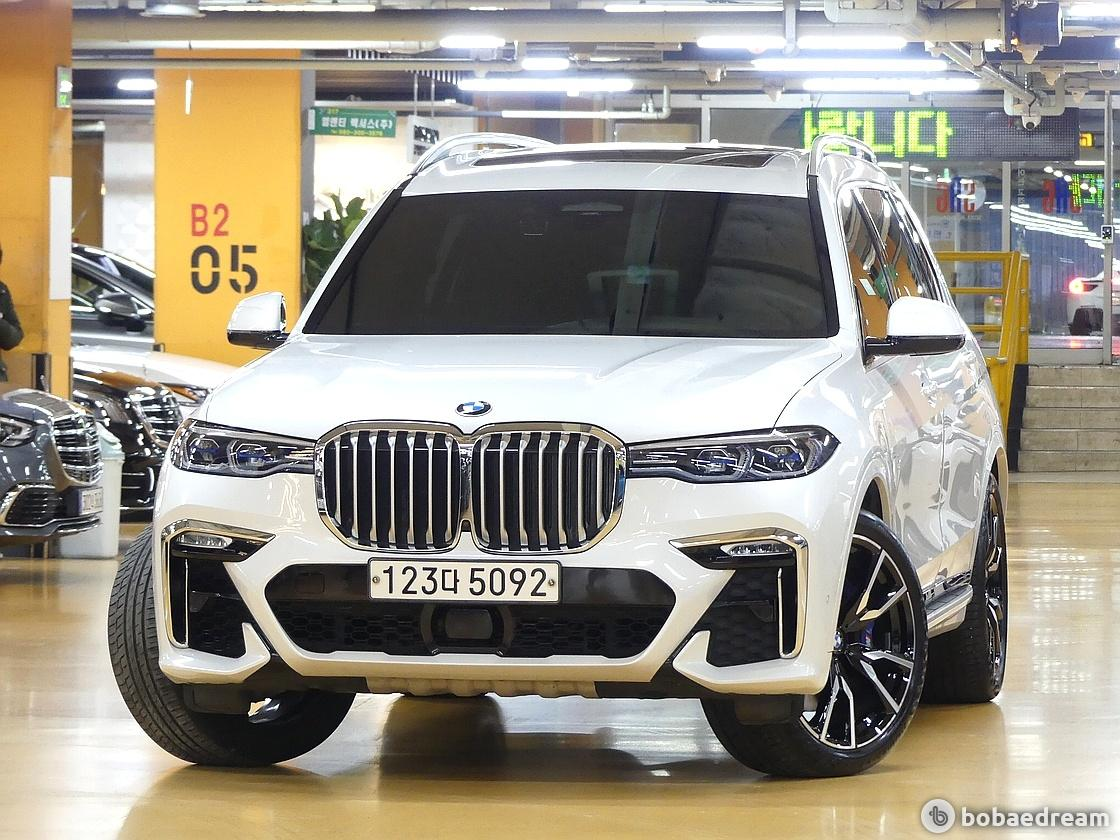

In [5]:
image

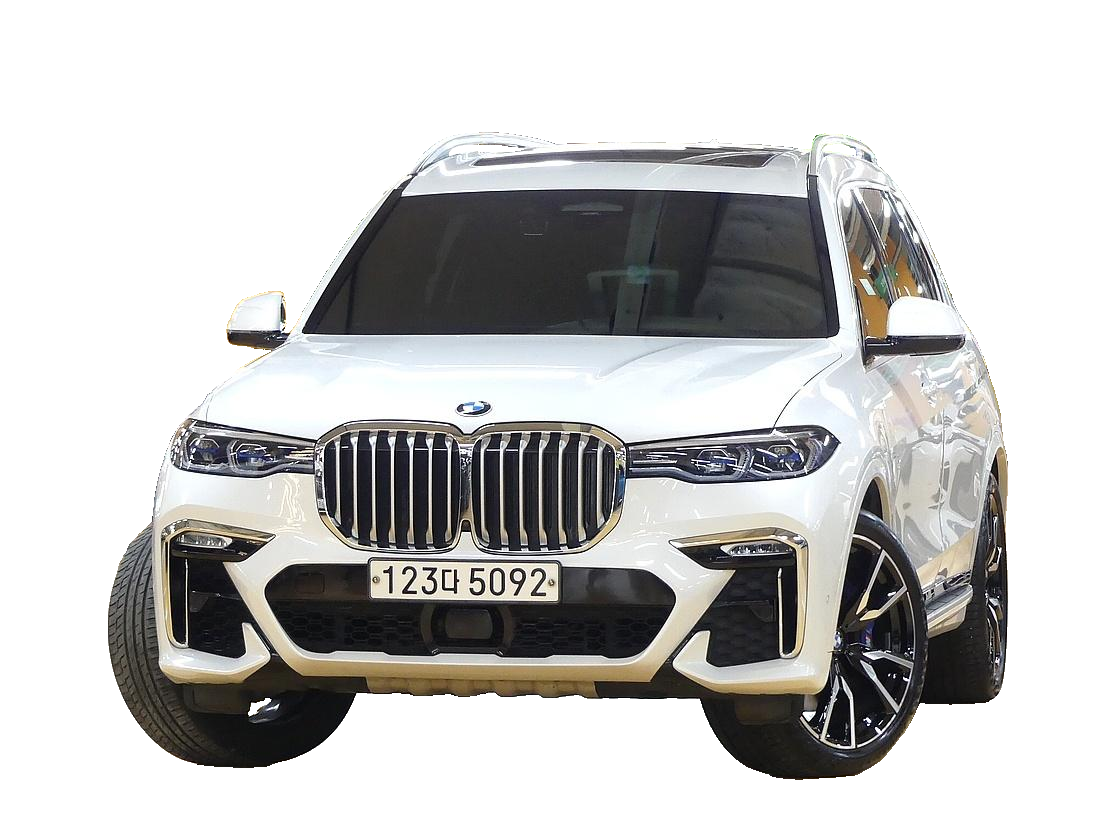

In [8]:
out = remover.process(image) # default setting - transparent background
out = remover.process(image, type='rgba') # same as above
out = remover.process(image, type='map') # object map only
out = remover.process(image, type='green') # image matting - green screen
out = remover.process(image, type='white') # change backround with white color
# out = remover.process(image, type=[255, 0, 0]) # change background with color code [255, 0, 0]
out = remover.process(image, type='blur') # blur background

out = remover.process(image, threshold=0.5) # use threhold parameter for hard prediction.
out